# 🔬 Estimation of the Rydberg Constant ($R_H$)

This notebook computes the Rydberg constant **R_H** using the values of A and B obtained from the previous simulation. It applies the known quantum energy level transitions of hydrogen and propagates the uncertainties analytically.

- **Inputs**:
  - Values of A and B with uncertainties
  - Hydrogen line wavelengths (λₐ, λ_b)
  - Quantum numbers: n₁ = 2, n₂ = 3 (H-alpha), n₂ = 4 (H-beta)

- **Output**:
  - Estimated value of R_H with uncertainty

Use this notebook to evaluate how experimental uncertainties affect the determination of fundamental constants.


## 🧠 Theoretical Background: The Rydberg Constant

The **Rydberg constant** \( R_H \) is a fundamental physical constant that describes the wavelengths of spectral lines in hydrogen and hydrogen-like atoms. It appears in the **Rydberg formula**, which gives the inverse of the wavelength $$ \lambda $$ of emitted or absorbed light as an electron transitions between energy levels:

$
\frac{1}{\lambda} = R_H \left( \frac{1}{n_1^2} - \frac{1}{n_2^2} \right)
$

where:
- $ \lambda $ is the wavelength of the spectral line,
- $ n_1 $ and $ n_2 $$ are the principal quantum numbers of the energy levels involved ($ n_2 > n_1 $),
- $ R_H $ is the Rydberg constant for hydrogen.

### Value and Importance
The currently accepted CODATA value is:

$
R_H \approx 1.0967757 \times 10^7 \, \text{m}^{-1}
$

This constant is central to atomic physics and quantum mechanics, as it encapsulates the binding energy structure of hydrogen. Precise determination of $ R_H $ allows experimental tests of quantum electrodynamics (QED), and contributes to defining other constants like the fine-structure constant $ \alpha $.

In this notebook, we estimate $ R_H $ by inverting the Rydberg formula using measured wavelengths for the Balmer series (H-alpha and H-beta) and the parameters A and B previously obtained from diffraction measurements.


In [11]:
from   ROOT import TCanvas, TF1, TGraphErrors, TRandom3
from   math import *
import numpy as np
import time 

In [12]:
#Parametri e misure

meanA = 1.7298
sigmaA = 0.0003
meanB = 13462
sigmaB = 58
corrAB = -0.876
th0 = 1.5701

alpha   = pi/3

eth     = 0.0005
sigmath = eth/sqrt(3)

#Funzioni 

def getLambda(theta,th0,A,B):
	n=sin((theta-th0+alpha)/2)/sin(alpha/2)		##refraction indexes
	l=sqrt(B/(n-A))
	return l	

In [13]:
#Main

theta=np.array([2.6773,2.7324,2.7651,2.7846]) ##red green blue violet

#n=np.array([])
l=np.array([])


for i in range(0,4):
	#n=np.append(n,sin((theta[i]-th0+alpha)/2)/sin(alpha/2))		##refraction indexes					
	l=np.append(l,getLambda(theta[i],th0,meanA,meanB))					##wavelenghts

##print("refraction indexes \n"), n
print("wavelenghts \n"), l

##preparo creazione del grafico per il fit per R_H

j=2					##livello energetico 2 dell'idrogeno, lettera n gia occupata
xaxis=np.array([3,4,5,6])		##array con le coord x

can=TCanvas()
can.Divide(2,2)

wavelenghts 



In [14]:
##considero solo errori sugli angoli th_i
can.cd(1)
can.SetTitle("Costante di Rydberg")
gr	= TGraphErrors ()						
gr.SetTitle("errori sugli angoli #theta_{i}")
gr.GetXaxis().SetTitle("m")
gr.GetYaxis().SetTitle("#lambda")

sigmaY=np.array([])						##array con gli errori su y
for i in range(0,4):
	sigmaY=np.append(sigmaY,getLambda(theta[i]+sigmath,th0,meanA,meanB)-l[i])

	gr.SetPoint(i,xaxis[i],l[i])
	gr.SetPointError(i,0,sigmaY[i])


gr.Draw("AP");	
f=TF1("f","1/([1]*(1/[0]^2-1/x^2))",0,10)
f.SetParName(1,"Rh")
f.SetParName(0,"n")
f.FixParameter(0,2)
f.SetParameter(1,0.01)
gr.Fit("f")
Rh_angoli=f.GetParameter(1)
sigmaRh_angoli=f.GetParError(1)


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      4.72129
NDf                       =            3
Edm                       =  1.75561e-08
NCalls                    =           24
n                         =            2                      	 (fixed)
Rh                        =    0.0109808   +/-   1.36274e-05 


 FCN=0.206556 FROM MIGRAD    STATUS=CONVERGED      15 CALLS          16 TOTAL
                     EDM=4.71799e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  n            2.00000e+00     fixed    
   2  Rh           1.09370e-02   1.31166e-05   7.03396e-09   7.40582e+01
 FCN=3.24722 FROM MIGRAD    STATUS=CONVERGED      15 CALLS          16 TOTAL
                     EDM=2.11631e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  n            2.00000e+00     fixed    
   2  Rh           1.09488e-02   1.17550e-05   1.18288e-08  -1.75017e+00
 FCN=2.6885 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=1.37703e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT

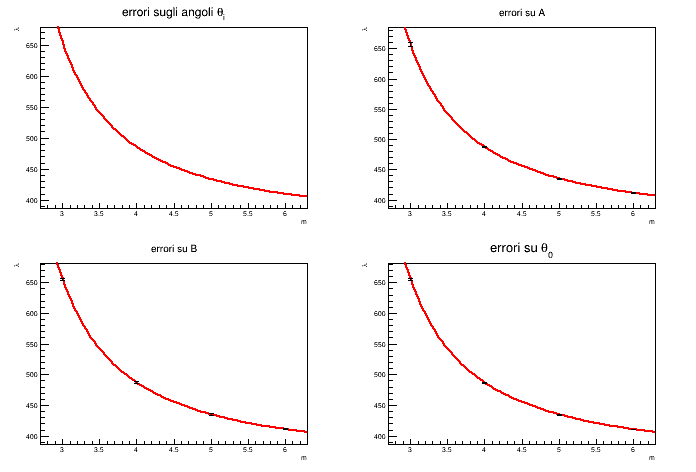

In [15]:
##errori su A e B e th0

grA	= TGraphErrors ()	
grB = TGraphErrors ()	
grTh0 = TGraphErrors ()

for i in range(0,4):
	sigmaYA=getLambda(theta[i],th0,meanA+sigmaA,meanB)-l[i]
	sigmaYB=getLambda(theta[i],th0,meanA,meanB+sigmaB)-l[i]
	sigmaYth0=getLambda(theta[i],th0+sigmath,meanA,meanB)-l[i]

	grA.SetPoint(i,xaxis[i],getLambda(theta[i],th0,meanA+sigmaA,meanB))
	grA.SetPointError(i,0,sigmaYA)
	grB.SetPoint(i,xaxis[i],getLambda(theta[i],th0,meanA,meanB+sigmaB))
	grB.SetPointError(i,0,sigmaYB)
	grTh0.SetPoint(i,xaxis[i],getLambda(theta[i],th0+sigmath,meanA,meanB))
	grTh0.SetPointError(i,0,sigmaYth0)

can.cd(2)
grA.SetTitle("errori su A")
grA.GetXaxis().SetTitle("m")
grA.GetYaxis().SetTitle("#lambda")
grA.Draw("AP");
grA.Fit("f")
RhA=f.GetParameter(1);
sigmaRh_A=f.GetParError(1)

can.cd(3)
grB.SetTitle("errori su B")
grB.GetXaxis().SetTitle("m")
grB.GetYaxis().SetTitle("#lambda")
grB.Draw("AP");
grB.Fit("f")
RhB=f.GetParameter(1);
sigmaRh_B=f.GetParError(1)

can.cd(4)
grTh0.SetTitle("errori su #theta_{0}")
grTh0.GetXaxis().SetTitle("m")
grTh0.GetYaxis().SetTitle("#lambda")
grTh0.Draw("AP");
grTh0.Fit("f")
RhTh0=f.GetParameter(1);
sigmaRh_th0=f.GetParError(1)
can.Draw()

In [16]:

sigmaRh_AB=sqrt((Rh_angoli-RhA)**2+(Rh_angoli-RhB)**2+2*corrAB*(RhA-Rh_angoli)*(RhB-Rh_angoli))
sigmaRh_Tot=sqrt(sigmaRh_angoli**2+sigmaRh_AB**2+(RhTh0-Rh_angoli)**2)

print ("\n")
print ("------------------------")
print ("\n")


print ("contributo da AB = ", sigmaRh_AB)
print ("contributo da th0 = ", abs(RhTh0-Rh_angoli))
print ("contributo da th_i = ", sigmaRh_angoli)


print ("Miglior stima per Costante di Rydberg: ", Rh_angoli,("+/-"),sigmaRh_Tot)



------------------------


contributo da AB =  2.2015812097512503e-05
contributo da th0 =  2.9700083182633216e-05
contributo da th_i =  1.362735981414785e-05
Miglior stima per Costante di Rydberg:  0.01098076575532574 +/- 3.940172405964696e-05
